In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

pd.set_option('display.max_columns', None)

In [41]:
df = pd.read_csv('data.csv', delimiter=';')
df.sample(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4177,1,39,1,9085,1,1,133.1,1,37,37,9,9,148.2,1,0,1,1,0,0,27,0,0,6,11,6,12.125000,0,0,6,16,5,12.000000,0,12.4,0.5,1.79,Enrolled
1171,1,17,4,9500,1,1,137.0,1,1,19,4,3,121.3,1,0,0,1,1,1,18,0,0,8,8,7,15.070000,0,0,8,8,7,15.070000,0,10.8,1.4,1.74,Graduate
3176,1,1,4,9500,1,1,133.0,1,19,19,9,5,120.1,1,0,0,1,0,1,19,0,0,7,9,6,12.428571,0,0,8,8,8,14.000000,0,13.9,-0.3,0.79,Graduate
3368,1,1,6,9500,1,1,145.0,1,19,37,9,9,132.3,1,0,0,1,0,1,19,0,0,8,8,7,14.060000,0,0,8,8,7,14.060000,0,10.8,1.4,1.74,Enrolled
3127,1,18,1,9147,1,1,128.0,1,19,19,9,5,121.7,1,0,0,1,0,0,19,0,0,5,8,5,11.000000,0,0,5,6,5,15.400000,0,12.4,0.5,1.79,Graduate
149,1,1,1,9500,1,1,136.0,1,1,19,9,9,131.5,0,0,0,1,0,1,20,0,0,7,8,6,13.863333,0,0,8,9,7,14.178571,0,11.1,0.6,2.02,Graduate
886,1,16,6,9773,1,1,136.0,1,38,14,0,0,129.7,1,0,0,1,0,0,21,0,0,6,6,6,13.166667,0,0,6,6,6,13.000000,0,7.6,2.6,0.32,Graduate
1499,1,44,1,9003,1,39,160.0,1,1,38,4,4,160.0,1,0,0,1,1,1,20,0,0,6,9,6,13.444444,0,0,6,9,5,12.600000,0,13.9,-0.3,0.79,Graduate
3425,2,43,2,9147,1,1,160.0,1,37,37,9,9,96.0,0,0,0,0,0,0,29,0,3,5,7,3,12.333333,0,0,5,8,0,0.000000,0,10.8,1.4,1.74,Dropout
231,1,39,1,9254,1,3,133.1,1,19,19,4,6,130.5,0,0,0,1,0,0,38,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,15.5,2.8,-4.06,Dropout


In [42]:
df.drop(['Application mode', 'Application order', 'Daytime/evening attendance\t', 'Nacionality', 'Unemployment rate', 'Inflation rate', 'GDP'], axis=1, inplace=True)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 30 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Course                                          4424 non-null   int64  
 2   Previous qualification                          4424 non-null   int64  
 3   Previous qualification (grade)                  4424 non-null   float64
 4   Mother's qualification                          4424 non-null   int64  
 5   Father's qualification                          4424 non-null   int64  
 6   Mother's occupation                             4424 non-null   int64  
 7   Father's occupation                             4424 non-null   int64  
 8   Admission grade                                 4424 non-null   float64
 9   Displaced                                

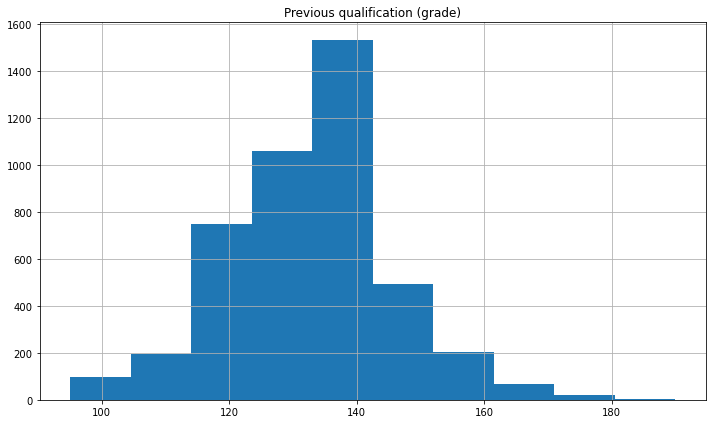

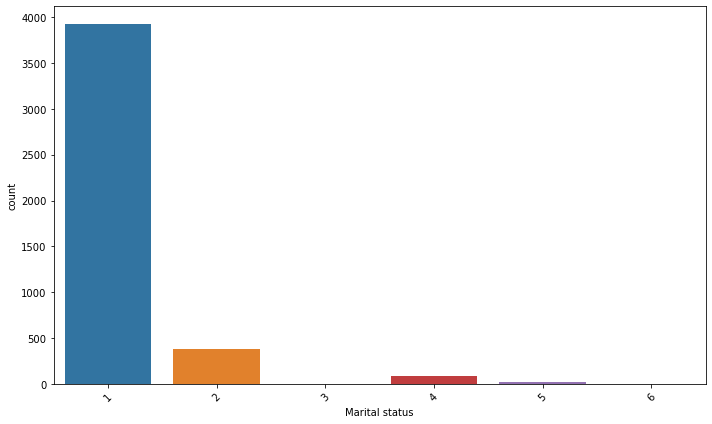

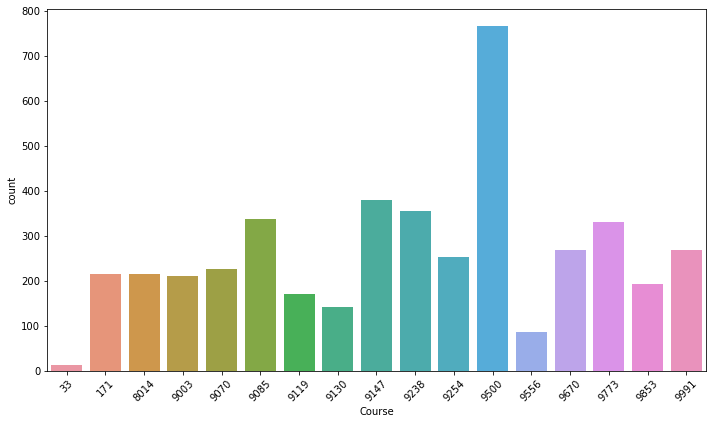

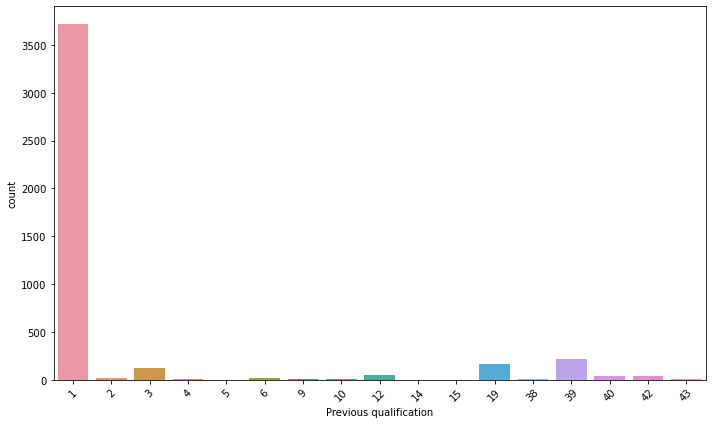

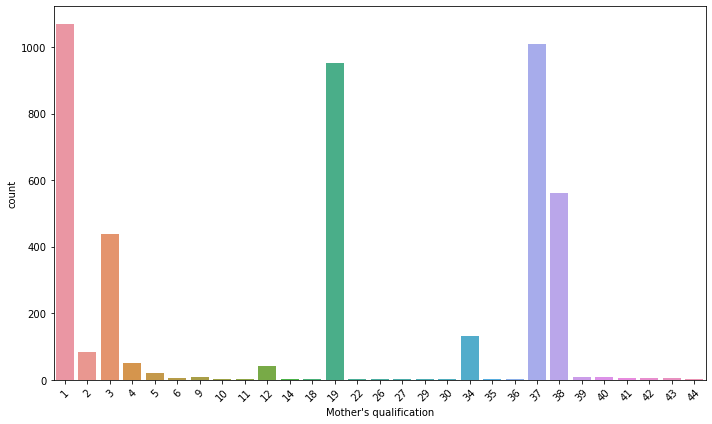

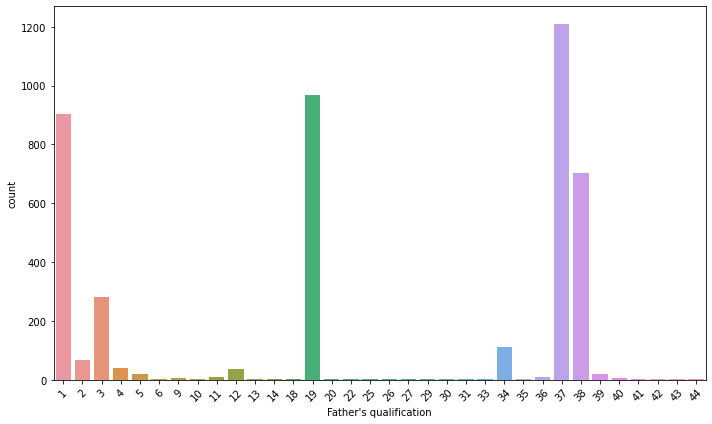

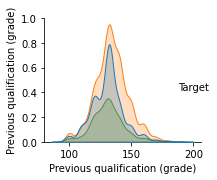

In [44]:
numerical_cols = ['Previous qualification (grade)']
df[numerical_cols].hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

categorical_cols = ['Marital status', 'Course', 'Previous qualification', 'Mother\'s qualification', 'Father\'s qualification']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

sns.pairplot(data=df, vars=numerical_cols, hue='Target')
plt.tight_layout()
plt.show()

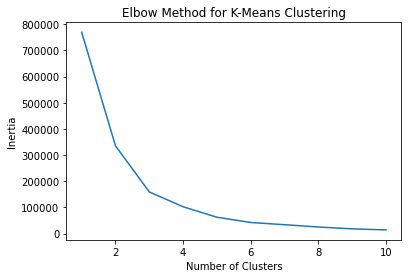

In [45]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[numerical_cols])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means Clustering')
plt.show()

In [46]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[numerical_cols])
df['KMeans_Cluster'] = kmeans.labels_

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical.fit(df[numerical_cols])
df['Hierarchical_Cluster'] = hierarchical.labels_

df.sample(10)

,Marital status,Course,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target,KMeans_Cluster,Hierarchical_Cluster
3628,1,171,1,143.0,3,37,9,9,142.7,1,0,0,1,0,0,18,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,Dropout,0,0
2778,1,9003,3,130.0,1,37,4,9,130.0,1,0,0,1,0,0,23,0,10,17,28,17,13.150000,2,8,12,22,12,13.214286,0,Graduate,0,0
3281,2,8014,3,130.0,35,35,90,90,140.0,0,0,0,0,0,0,59,0,10,15,22,12,13.333333,0,8,8,8,8,12.875000,0,Dropout,0,0
3022,1,9853,1,140.0,38,19,4,10,122.3,1,0,0,1,0,0,19,0,0,6,9,4,13.000000,0,0,6,9,4,12.250000,0,Dropout,0,0
3133,1,9500,1,122.0,1,1,4,4,119.6,1,0,0,1,0,0,21,0,0,7,8,6,13.250000,0,0,8,8,8,13.837500,0,Enrolled,2,1
37,1,9147,1,140.0,37,37,6,6,122.9,0,0,0,1,0,0,55,0,0,5,10,1,10.000000,0,0,5,8,2,12.000000,2,Dropout,0,0
1618,1,9773,1,130.0,19,1,9,9,126.9,1,0,0,1,0,1,19,1,0,6,8,6,13.166667,0,0,6,6,6,13.000000,0,Dropout,0,0
4004,1,9070,1,128.0,37,37,9,9,123.5,1,0,0,1,1,1,21,0,0,6,6,6,13.166667,0,0,6,8,6,13.285714,0,Graduate,0,0
2448,1,9119,19,120.0,37,37,9,4,98.6,0,0,1,0,1,0,28,0,0,5,10,0,0.000000,0,0,5,7,0,0.000000,0,Dropout,2,1
1699,1,9500,3,130.0,37,37,90,90,130.0,1,0,0,1,1,0,30,0,0,8,8,0,0.000000,8,0,8,8,0,0.000000,8,Dropout,0,0


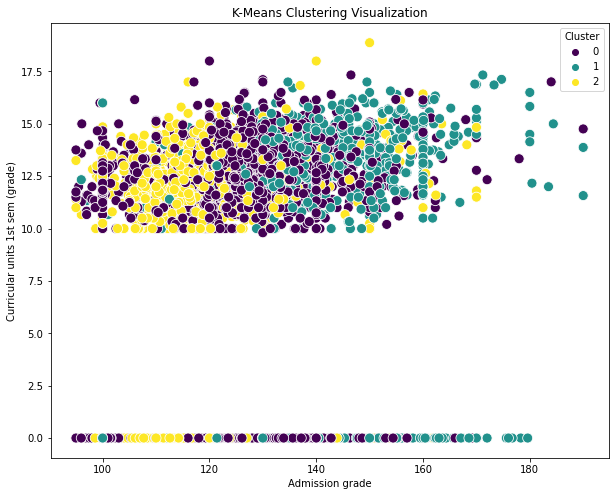

In [47]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Admission grade', y='Curricular units 1st sem (grade)',
    hue='KMeans_Cluster', data=df, palette='viridis', s=100
)
plt.title('K-Means Clustering Visualization')
plt.xlabel('Admission grade')
plt.ylabel('Curricular units 1st sem (grade)')
plt.legend(title='Cluster')
plt.show()

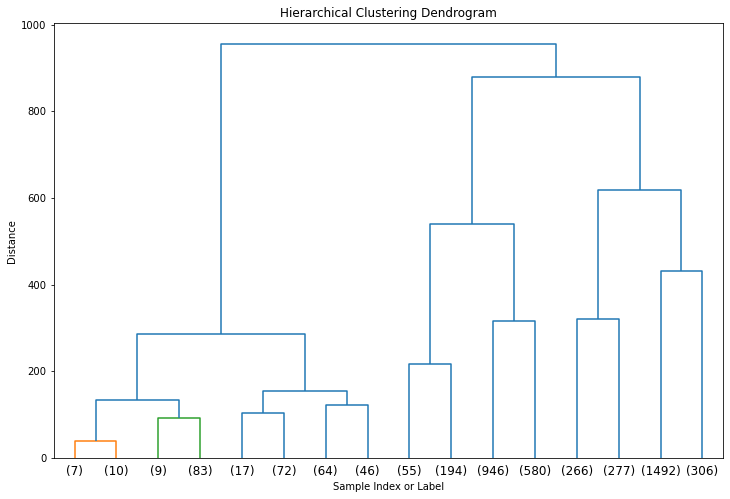

In [48]:
selected_features = [
    'Marital status', 'Previous qualification', 'Admission grade',
    'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender',
    'Scholarship holder', 'Age at enrollment', 'International',
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)'
]

selected_df = df[selected_features]
linkage_matrix = linkage(df[selected_features], method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=3, orientation='top', labels=df.index, color_threshold=100)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Label')
plt.ylabel('Distance')
plt.show()